In [1]:
import datetime as dt

import plotly.express as px
import polars as pl

from stocksense.config import config
from stocksense.database import DatabaseHandler
from stocksense.model import XGBoostRegressor
from stocksense.pipeline import clean, engineer_features

features = config.model.features
date_col = config.model.date_col
aux_cols = ["tic", "datadate", "rdq"]
target = "fwd_return_4Q"

In [2]:
constituents = DatabaseHandler().fetch_constituents(dt.datetime(2022, 6, 1))

2024-12-16 21:23:16.444 | SUCCESS  | stocksense.database.schema:create_tables:121 - Tables created successfully


In [3]:
data = engineer_features()
data = clean(data)
data.head()

2024-12-16 21:23:16.452 | INFO     | stocksense.pipeline.preprocess:engineer_features:20 - START processing stock data
2024-12-16 21:23:16.454 | SUCCESS  | stocksense.database.schema:create_tables:121 - Tables created successfully
2024-12-16 21:23:20.669 | INFO     | stocksense.pipeline.preprocess:engineer_features:33 - START feature engineering
2024-12-16 21:23:36.935 | SUCCESS  | stocksense.pipeline.preprocess:engineer_features:47 - END 58960 rows PROCESSED
2024-12-16 21:23:36.938 | INFO     | stocksense.pipeline.preprocess:clean:69 - START cleaning data
2024-12-16 21:23:37.087 | SUCCESS  | stocksense.pipeline.preprocess:clean:107 - 37806 rows retained after CLEANING


tdq,tic,datadate,rdq,saleq,cogsq,xsgaq,niq,ebitdaq,cshoq,actq,atq,cheq,rectq,invtq,ppentq,lctq,dlttq,ltq,req,seqq,oancfq,ivncfq,fincfq,dvq,capxq,icaptq,surprise_pct,stock_split,n_purch,val_purch,n_sales,val_sales,insider_balance,roa,roi,roe,…,ltda_2y,pe_yoy,pe_2y,pb_yoy,pb_2y,ps_yoy,ps_2y,eps_yoy,eps_2y,ev_ebitda_yoy,ltcr_yoy,itr_yoy,rtr_yoy,atr_yoy,size_yoy,roa_sec_qoq,roa_sec_yoy,f_score,forward_vol_yoy,forward_vol_sos,forward_vol_qoq,excess_return_1Q,sharpe_ratio_1Q,risk_return_1Q,excess_return_2Q,sharpe_ratio_2Q,risk_return_2Q,excess_return_3Q,sharpe_ratio_3Q,risk_return_3Q,excess_return_4Q,sharpe_ratio_4Q,risk_return_4Q,fwd_return,excess_return,sharpe_ratio,risk_return
date,str,date,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,u32,f64,u32,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2007-03-01,"""A""",2007-01-31,2007-02-15,1280.0,540.0,564.0,150.0,176.0,405.0,3749.0,7193.0,2090.0,671.0,648.0,775.0,1372.0,1500.0,3536.0,1705.0,3657.0,93.0,-93.0,-169.0,0.0,37.0,5157.0,0.011,0,0,0.0,1,8.598,8.598,8.911442,2.908668,0.17528,…,29.655039,282.560607,null,-7.754803,9.151709,-19.208201,null,-77.612898,null,-45.435715,131.460674,25.76978,22.719366,11.302357,-1.218827,-86.503836,-83.655657,6,1.780824,1.749898,1.355307,8.952132,6.605244,10.89898,13.694795,10.104573,15.070857,8.583285,4.905021,9.151445,10.709357,6.013709,6.242292,16.014092,8.583285,4.905021,9.151445
2007-06-01,"""A""",2007-04-30,2007-05-14,1320.0,540.0,586.0,123.0,194.0,395.958,3791.0,7283.0,2050.0,718.0,650.0,777.0,1554.0,1500.0,3728.0,1881.0,3555.0,302.0,-36.0,-320.0,0.0,42.0,5055.0,-0.023,0,0,0.0,3,2.695,2.695,8.911163,2.433234,0.18256,…,30.16614,300.0,null,16.399931,38.944827,-0.630294,null,-77.181676,null,-29.485541,7.883817,19.259654,24.025332,18.364403,-1.122916,13.440324,-81.598553,6,1.927423,1.918095,2.106162,1.404396,0.666804,-0.836463,-2.215787,-1.05205,-2.205524,-0.292617,-0.152556,-4.454244,-5.91296,-3.067807,-8.865139,-8.543662,-0.292617,-0.152556,-4.454244
2007-09-01,"""A""",2007-07-31,2007-08-14,1374.0,563.0,580.0,185.0,231.0,386.548,3281.0,7024.0,1486.0,738.0,674.0,787.0,1510.0,1500.0,3736.0,2069.0,3288.0,176.0,-258.0,-484.0,0.0,36.0,4788.0,-0.01,0,0,0.0,2,5.747,5.747,8.6418,3.863826,0.184611,…,36.525701,300.0,null,25.872772,5.91443,3.996541,null,-79.822287,null,-17.061919,300.0,18.769156,29.327755,22.359853,-1.068351,-14.122377,-85.588435,5,1.772393,1.803532,1.789715,-1.703536,-0.951848,0.168495,-0.089423,-0.049965,-2.674412,-6.394643,-3.545622,-7.722925,10.925009,6.163987,-0.514147,-13.928545,-6.394643,-3.545622,-7.722925
2007-12-01,"""A""",2007-10-31,2007-11-15,1446.0,611.0,598.0,180.0,237.0,370.0,3671.0,7554.0,1826.0,735.0,643.0,801.0,1663.0,2087.0,4320.0,2580.0,3234.0,398.0,-69.0,-7.0,0.0,39.0,5321.0,0.022,0,0,0.0,2,2.75,2.75,8.445856,3.382823,0.197279,…,400.0,300.0,-60.359786,21.410892,-1.590112,-1.541225,-26.668893,-78.726207,165.240102,-12.283396,-32.276673,10.125696,14.20785,12.76951,0.27844,-3.477092,-87.309223,4,3.004222,1.948736,1.848409,-3.735506,-2.02093,-6.186043,-8.003799,-4.330101,-8.594016,8.239344,4.228045,-2.316993,-2.055557,-0.684223,-10.49239,-4.515208,8.239344,4.228045,-2.316993
2008-03-01,"""A""",2008-01-31,2008-02-13,1393.0,580.0,617.0,120.0,196.0,368.0,5070.0,7459.0,3148.0,726.0,674.0,801.0,2674.0,626.0,4286.0,2657.0,3173.0,4.0,-295.0,-168.0,0.0,34.0,3799.0,0.021,0,0,0.0,2,3.418,3.418,8.151227,3.158726,0.191617,…,-55.094284,-6.732989,256.802843,1.959688,-5.947085,-18.681512,-34.301331,4.388523,-76.630435,-22.566969,-228.366043,5.357524,1.528223,5.558859,0.408891,-20.5599,-25.300507,5,3.238751,1.741436,2.050642,1.053516,0.513749,2.536928,20.442391,9.968778,8.760186,6.726355,3.862535,-7.914079,-6.951969,-2.146497,-13.35568,-13.781859,6.726355,3.862535,-7.914079


In [4]:
hd = data.filter(pl.col("tic") == "EOG").select(["tdq"] + features)
hd

tdq,insider_balance,mkt_rel,volume_ma20,volume_ma50,volume_ratio,vol_mom,vol_qoq,vol_sos,vol_yoy,vol_2y,rel_vol_month,rel_vol_quarter,rel_vol_year,rel_vol_2year,price_mom,price_qoq,price_yoy,price_2y,price_risk_quarter,price_risk_semester,price_risk_year,price_risk_2year,rsi_14d,rsi_30d,rsi_60d,rsi_90d,momentum_month,momentum_quarter,momentum_year,momentum_2year,ma20_distance,ma50_distance,index_mom,index_qoq,index_sos,index_yoy,…,niq_yoy,niq_2y,ltq_yoy,ltq_2y,dlttq_yoy,gpm_yoy,gpm_2y,roa_yoy,roa_2y,roi_yoy,roi_2y,roe_yoy,fcf_yoy,der_yoy,dr_yoy,dr_2y,ltda_yoy,ev_ebitda_yoy,ltcr_yoy,pe_yoy,pe_2y,ps_yoy,atr_yoy,size_yoy,roa_sec_qoq,roa_sec_yoy,sector_utilities,sector_health_care,sector_financials,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_industrials,sector_information_technology,sector_communication_services,sector_materials,sector_real_estate
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
2007-03-01,-0.122,0.020712,80.093026,91.637453,79.80161,1.427678,1.855661,1.967725,2.252324,2.375085,1.619844,2.975568,3.509585,3.691369,-1.483977,-6.952532,-0.519286,47.168571,-3.746661,-0.584397,-0.230555,19.859738,51.002121,51.250925,50.557955,50.308258,0.826645,-26.367919,-0.054284,2.84472,-0.000136,0.009391,-1.795181,0.263674,7.788567,9.566162,…,-47.671334,null,10.633053,400.0,-14.615968,-5.556238,NaN,-14.897831,null,-57.238137,null,-20.452074,-173.322606,-14.722747,-8.768468,NaN,-29.589614,-5.199647,-185.873909,-4.291725,null,-8.844133,-37.969979,2.152981,-38.187938,-49.284264,0,0,0,0,0,1,0,0,0,0,0
2007-06-01,2.107,0.02213,68.435574,73.865072,77.288318,1.402855,1.388149,1.647004,1.991601,2.275136,2.501956,2.261284,3.063647,3.601923,-0.348798,16.525684,17.484001,54.620165,11.904835,5.278561,8.778866,24.007433,53.937932,55.603691,54.991603,53.918255,-0.129088,1.636282,0.834038,1.88725,0.007381,0.031867,2.702011,10.099535,10.789489,20.963082,…,-48.989119,7.382229,13.747311,34.345981,1.406636,-5.75132,-2.860093,-38.320134,null,-57.511809,-31.156369,-40.337106,-185.705471,-7.701769,-4.581523,-16.372205,-14.933666,38.45163,-184.51663,60.314379,null,27.755588,-33.379754,1.948585,-67.487703,-84.956173,0,0,0,0,0,1,0,0,0,0,0
2007-09-01,-0.631,0.021312,98.885923,102.629492,58.79258,1.871273,1.891441,1.67721,1.818684,2.283939,1.173555,1.549188,2.294374,3.094745,-7.902651,-11.8786,3.328728,6.582278,-6.280184,2.355468,1.830295,2.881985,42.441533,43.679849,46.429625,47.889124,-64.994572,4.154032,0.257693,0.299499,-0.020061,-0.051457,0.121589,-2.859535,7.267924,12.91741,…,-7.351464,23.089042,21.120907,39.740641,15.017399,-4.569864,-6.291912,-44.060434,null,-23.612952,-22.53336,-44.264583,-300.0,-0.90273,-0.539754,-14.653898,-5.55174,22.129375,-300.0,51.320412,null,11.606056,-5.327607,2.17368,-118.33077,-102.846182,0,0,0,0,0,1,0,0,0,0,0
2007-12-01,8.751,0.030045,95.297027,97.789656,83.777889,1.588583,1.584528,1.755026,1.701752,2.078675,0.953015,1.297375,1.760496,2.545329,-6.568849,19.296728,14.876494,16.525898,12.178216,2.794439,8.741868,7.950207,47.973113,53.232412,54.00601,53.631722,1.491448,32.102213,2.549516,0.929133,-0.011529,0.017101,-4.404342,0.601103,-3.770841,5.835027,…,-31.802591,-40.655572,31.152631,52.453846,67.979791,-2.951328,-5.400916,-48.958167,null,-46.053528,-62.821352,-47.244684,-5.595445,8.336204,4.817463,-6.587688,34.249809,42.909197,37.138007,85.29262,null,27.663583,-15.212389,2.456842,-150.0,-121.803889,0,0,0,0,0,1,0,0,0,0,0
2008-03-01,2.361,0.053174,158.645323,119.30443,199.60587,4.440275,3.190493,2.480721,2.130664,2.193173,3.338771,2.431481,1.897736,2.399579,37.465343,43.742449,77.464567,76.54302,13.710248,31.580468,36.357008,34.900592,70.431836,66.804906,63.405984,61.437419,-20.173066,-4.30461,-14.984271,19.616899,0.168809,0.257977,-1.857196,-10.161768,-9.0950

In [5]:
df = data.to_pandas()
df_standardized = (df[features] - df[features].mean()) / df[features].std()
corr = df_standardized.corrwith(df[target])
corr_df = pl.DataFrame({"Feature": corr.index, "Correlation": corr.values}).sort(
    "Correlation", descending=False
)

fig = px.bar(
    corr_df,
    x="Correlation",
    y="Feature",
    orientation="h",
    title=f"Feature Correlations with Target ({target})",
    width=1000,
    height=1200,
)
fig.update_layout(yaxis={"tickfont": {"size": 10}}, showlegend=False, margin={"l": 200})
fig.add_vline(x=0, line_dash="dash", line_color="gray")
fig.show()

In [6]:
data = data.select(["tic", date_col] + features + [target])
data = data.filter((~pl.all_horizontal(pl.col(target).is_null())))
train = data.filter((pl.col("tdq").dt.year() >= 2007) & (pl.col("tdq").dt.year() < 2022))
val = data.filter(
    (pl.col("tdq").dt.year() >= 2023)
    & (pl.col("tdq").dt.year() <= 2023)
    & pl.col("tic").is_in(constituents)
)

X_train = train.select(features).to_pandas()
y_train = train.select(target).to_pandas().values.ravel()
X_val = val.select(features).to_pandas()
y_val = val.select(target).to_pandas().values.ravel()

params = {
    "objective": "reg:absoluteerror",
    "learning_rate": 0.07,
    "n_estimators": 394,
    "max_depth": 4,
    "min_child_weight": 1.58,
    "gamma": 0.15,
    "subsample": 0.58,
    "colsample_bytree": 0.70,
    "reg_alpha": 5.47,
    "reg_lambda": 7.07,
    "eval_metric": "mae",
    "nthread": -1,
    "seed": 100,
}

model = XGBoostRegressor(params)
model.train(X_train, y_train)

print(f"RMSE: {model.get_rmse(X_val, y_val)}")
print(f"MAE: {model.get_mae(X_val, y_val)}")

RMSE: 27.280662521042228
MAE: 20.210763618884588


In [7]:
y_pred = model.predict(X_val)
val_subset = val.with_columns(pl.Series("pred", y_pred)).sort("pred", descending=True)
n = 100
top = val_subset.head(n)
bottom = val_subset.tail(n)

top_freturn = top.select(pl.col(target)).mean().item()
bottom_freturn = bottom.select(pl.col(target)).mean().item()
freturn = val_subset.select(pl.col(target)).mean().item()

print(f"Average freturn: {freturn:.2f}%")

print(f"\nTop {n} stocks: {top_freturn:.2f}%")
print(f"\nBottom {n} stocks: {bottom_freturn:.2f}%")

Average freturn: 15.84%

Top 100 stocks: 13.35%

Bottom 100 stocks: 2.85%


In [8]:
top = val_subset.head(100).filter((pl.col("pe") < 50) & (pl.col("pe") > 0) & (pl.col("pred") > 5))
print(top.select(pl.col(target)).mean().item())
top

16.401876551077624


tic,tdq,insider_balance,mkt_rel,volume_ma20,volume_ma50,volume_ratio,vol_mom,vol_qoq,vol_sos,vol_yoy,vol_2y,rel_vol_month,rel_vol_quarter,rel_vol_year,rel_vol_2year,price_mom,price_qoq,price_yoy,price_2y,price_risk_quarter,price_risk_semester,price_risk_year,price_risk_2year,rsi_14d,rsi_30d,rsi_60d,rsi_90d,momentum_month,momentum_quarter,momentum_year,momentum_2year,ma20_distance,ma50_distance,index_mom,index_qoq,index_sos,…,ltq_yoy,ltq_2y,dlttq_yoy,gpm_yoy,gpm_2y,roa_yoy,roa_2y,roi_yoy,roi_2y,roe_yoy,fcf_yoy,der_yoy,dr_yoy,dr_2y,ltda_yoy,ev_ebitda_yoy,ltcr_yoy,pe_yoy,pe_2y,ps_yoy,atr_yoy,size_yoy,roa_sec_qoq,roa_sec_yoy,sector_utilities,sector_health_care,sector_financials,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_industrials,sector_information_technology,sector_communication_services,sector_materials,sector_real_estate,fwd_return_4Q,pred
str,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,f64,f32
"""KEY""",2023-09-01,-0.115,0.024961,72.775971,100.218466,64.907363,2.251795,2.763218,4.56359,3.608747,2.912914,2.991082,4.179946,3.168861,2.35582,-3.986707,8.851229,-34.652346,-43.110233,3.203233,-8.085644,-9.602322,-14.799691,58.179644,53.431223,49.219843,47.646334,-12.930742,1.634932,-2.443961,282.155411,0.03819,0.046321,0.308312,5.41382,11.620662,…,4.990121,11.042813,74.640428,5.378151,4.131296,-36.01828,-40.947265,-58.353563,-69.406238,-30.461202,300.0,9.411476,0.66804,3.11643,67.451085,NaN,300.0,-1.601527,-12.105758,-41.610551,-22.903074,0.346307,-10.104881,10.131954,0,0,1,0,0,0,0,0,0,0,0,36.20497,28.27339
"""ZION""",2023-09-01,0.0,0.012457,67.094137,97.966104,81.186726,2.125557,3.036259,5.065306,3.924108,3.187359,2.823399,4.592979,3.445782,2.577777,-2.592893,20.982728,-33.781575,-37.063907,6.910716,-5.129027,-8.608726,-11.628406,56.912647,55.227848,51.62677,49.658825,-8.409955,3.875771,-2.382548,242.582357,0.031525,0.065427,0.308312,5.41382,11.620662,…,-0.249537,3.501105,-20.417288,1.960784,1.973684,4.268139,-21.818088,1.052651,-14.119773,10.454691,11.627907,6.340073,0.38398,3.475001,-19.911856,35.058661,40.266527,-37.321426,-25.946268,-48.657936,1.767319,-0.055619,-6.271812,25.045509,0,0,1,0,0,0,0,0,0,0,0,29.613784,26.448109
"""JKHY""",2023-09-01,0.0,0.02659,92.144434,88.356259,55.384387,1.876748,1.380782,1.93967,1.829635,1.681373,2.492904,2.088722,1.606613,1.35981,-7.641973,1.724587,-17.752339,-10.375327,1.248993,-2.477478,-9.702664,-6.170747,41.13505,45.223063,47.496861,47.810916,-24.786466,0.318553,-1.252037,67.906262,-0.017145,-0.028559,0.308312,5.41382,11.620662,…,8.508382,14.599002,139.130435,4.067127,8.427101,-10.563895,-0.858668,-3.401706,-4.140208,-13.222602,-40.776642,-6.797175,-3.941604,-3.483078,111.693195,-22.40834,-75.233868,-20.330936,-27.025187,-24.734773,-2.690912,1.561227,-2.883231,-7.993228,0,0,1,0,0,0,0,0,0,0,0,6.47807,25.784447
"""SEDG""",2023-12-01,-1.453,0.010806,179.675028,200.457498,167.280681,3.490529,5.137851,4.354555,3.985649,4.249354,5.101922,6.29969,4.58051,3.432714,8.827025,-47.094287,-72.401791,-74.835245,-9.166144,-16.456838,-18.165623,-17.61097,48.30073,36.555129,36.010933,38.736523,1.04851,-16.283295,-5.741417,-123.696711,0.026696,-0.169845,8.418637,2.892184,7.291751,…,16.707671,52.730023,-6.362984,-25.785971,-39.933024,60.287896,-14.812534,-300.0,-169.859139,57.375175,-207.304786,-3.831358,-2.051456,-12.75753,-21.413826,-83.09423,-214.596546,-85.880095,-82.168313,-78.953779,-28.815308,2.118955,-65.627493,31.596035,0,0,0,0,0,0,0,1,0,0,0,-78.01517,25.131428
"""MKTX""",2023-09-01,-0.193,0.020716,89.149361,99.575999,65.741831,1.757855,1.674163,2.120172,2.360708,2.278872,2.334976,2.532522,2.072951,1.843038,-3.960757,-10.321778,-3.922121,-49.815097,-6.165337,-16.680152,-1.661417,-21.859544,38.235778,39.718374,41.9051,43.905193,-12.846572,-

In [9]:
eval_dates = ["2023-03-01", "2023-06-01", "2023-09-01", "2023-12-01"]

for date in eval_dates:
    y_pred = model.predict(X_val)
    val_subset = (
        val.with_columns(pl.Series("pred", y_pred))
        .filter(pl.col("tdq") == pl.lit(date).str.to_date())
        .sort("pred", descending=True)
    )
    n = 40
    top = val_subset.head(n)
    bottom = val_subset.tail(n)

    # Calculate average returns for top stocks
    top_freturn = top.select(pl.col(target)).mean().item()

    # Calculate average returns for bottom stocks
    bottom_freturn = bottom.select(pl.col(target)).mean().item()

    print(f"\nDATE {date}")
    print(f"\nTop {n} stocks:")
    print(f"Average freturn: {top_freturn:.2f}%")
    print(f"\nBottom {n} stocks:")
    print(f"Average freturn: {bottom_freturn:.2f}%")


DATE 2023-03-01

Top 40 stocks:
Average freturn: 13.44%

Bottom 40 stocks:
Average freturn: 1.47%

DATE 2023-06-01

Top 40 stocks:
Average freturn: 17.32%

Bottom 40 stocks:
Average freturn: 19.74%

DATE 2023-09-01

Top 40 stocks:
Average freturn: 11.83%

Bottom 40 stocks:
Average freturn: 14.32%

DATE 2023-12-01

Top 40 stocks:
Average freturn: 22.72%

Bottom 40 stocks:
Average freturn: 18.23%


In [10]:
top

tic,tdq,insider_balance,mkt_rel,volume_ma20,volume_ma50,volume_ratio,vol_mom,vol_qoq,vol_sos,vol_yoy,vol_2y,rel_vol_month,rel_vol_quarter,rel_vol_year,rel_vol_2year,price_mom,price_qoq,price_yoy,price_2y,price_risk_quarter,price_risk_semester,price_risk_year,price_risk_2year,rsi_14d,rsi_30d,rsi_60d,rsi_90d,momentum_month,momentum_quarter,momentum_year,momentum_2year,ma20_distance,ma50_distance,index_mom,index_qoq,index_sos,…,ltq_yoy,ltq_2y,dlttq_yoy,gpm_yoy,gpm_2y,roa_yoy,roa_2y,roi_yoy,roi_2y,roe_yoy,fcf_yoy,der_yoy,dr_yoy,dr_2y,ltda_yoy,ev_ebitda_yoy,ltcr_yoy,pe_yoy,pe_2y,ps_yoy,atr_yoy,size_yoy,roa_sec_qoq,roa_sec_yoy,sector_utilities,sector_health_care,sector_financials,sector_consumer_discretionary,sector_consumer_staples,sector_energy,sector_industrials,sector_information_technology,sector_communication_services,sector_materials,sector_real_estate,fwd_return_4Q,pred
str,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,f64,f32
"""SEDG""",2023-12-01,-1.453,0.010806,179.675028,200.457498,167.280681,3.490529,5.137851,4.354555,3.985649,4.249354,5.101922,6.29969,4.58051,3.432714,8.827025,-47.094287,-72.401791,-74.835245,-9.166144,-16.456838,-18.165623,-17.61097,48.30073,36.555129,36.010933,38.736523,1.04851,-16.283295,-5.741417,-123.696711,0.026696,-0.169845,8.418637,2.892184,7.291751,…,16.707671,52.730023,-6.362984,-25.785971,-39.933024,60.287896,-14.812534,-300.0,-169.859139,57.375175,-207.304786,-3.831358,-2.051456,-12.75753,-21.413826,-83.09423,-214.596546,-85.880095,-82.168313,-78.953779,-28.815308,2.118955,-65.627493,31.596035,0,0,0,0,0,0,0,1,0,0,0,-78.01517,25.131428
"""TECH""",2023-12-01,0.718,0.02358,119.451277,118.277512,119.475887,2.486013,2.216999,1.978903,2.008202,2.311104,3.633674,2.718335,2.307928,1.866956,22.222217,-14.48815,-24.026354,-45.283139,-6.535029,-11.220774,-11.964115,-19.593729,58.481424,49.003173,45.879224,45.911924,2.639646,-5.009415,-1.905275,-74.849429,0.040884,0.004632,8.418637,2.892184,7.291751,…,26.36019,21.562115,66.250411,0.405214,0.785946,-27.918731,15.07685,-53.008882,-41.33195,-25.939992,-18.34846,10.762906,7.803536,0.157051,41.83567,-29.419107,-50.886413,-13.637942,-61.494918,-28.720505,-11.551772,2.046074,-49.839464,-63.243902,0,1,0,0,0,0,0,0,0,0,0,14.382879,24.152769
"""ROL""",2023-12-01,4592.09,0.045666,102.594657,140.477891,79.680209,0.844529,1.854283,1.688063,1.447506,1.677789,1.234404,2.273598,1.663548,1.355352,9.914021,7.431717,1.162219,22.926687,4.007865,0.408245,0.802911,13.664824,71.198222,60.708252,54.727219,53.134934,1.177628,2.569586,0.092163,37.895991,0.040018,0.064632,8.418637,2.892184,7.291751,…,67.819663,91.377567,300.0,2.833922,1.416845,-6.98608,-16.053608,-8.731949,-7.802986,26.115684,-5.663169,82.079214,34.288621,38.085006,300.0,-15.858989,-82.626865,-14.347704,8.29327,-11.989759,-5.914803,2.911568,7.05965,-15.337104,0,0,0,0,0,0,1,0,0,0,0,22.892002,23.820341
"""COF""",2023-12-01,4.473,0.100102,79.19481,83.36863,118.350291,1.490937,1.904989,1.691918,2.071219,2.377183,2.179224,2.33577,2.38035,1.920337,13.623221,12.290559,10.354516,-18.928342,6.451775,1.840164,4.999239,-7.962509,73.927906,63.524201,56.585566,53.944884,1.618222,4.249577,0.821107,-31.287044,0.069523,0.102358,8.418637,2.892184,7.291751,…,6.201779,15.458513,-9.900331,13.594549,4.878672,-40.217857,-61.477309,8.292534,-43.556555,-39.875297,147.389269,0.647102,0.073666,4.17851,-15.099311,-13.633616,174.572894,79.111456,66.801725,-7.155515,-11.813787,0.457043,-3.783664,-12.315291,0,0,1,0,0,0,0,0,0,0,0,42.11067,23.385965
"""SYF""",2023-12-01,0.0,0.032282,81.370296,85.047692,121.291674,2.363678,2.085339,1.774504,2.111396,2.466246,3.454863,2.556903,2.426524,1.992284,20.951028,6.61835,-9.978712,-24.469745,3.173753,1.347444,-4.726121,-9.921859,73.081432,61.513083,54.913856,52.627979,2.488649,2.

In [11]:
model.get_importance("gain")

[('low_fear', 68.95872497558594),
 ('index_mom', 60.010066986083984),
 ('fear_ma30', 58.648406982421875),
 ('index_sos', 50.77645492553711),
 ('index_qoq', 39.54121017456055),
 ('index_yoy', 31.58717918395996),
 ('index_2y', 30.91457748413086),
 ('vol_sos', 22.91139030456543),
 ('pe_2y', 21.368375778198242),
 ('sector_energy', 21.35287094116211),
 ('sector_financials', 21.060564041137695),
 ('size_sec', 20.82137680053711),
 ('high_fear', 19.292503356933594),
 ('size', 18.038829803466797),
 ('rel_vol_2year', 17.877622604370117),
 ('momentum_sec', 17.426746368408203),
 ('sector_information_technology', 17.424243927001953),
 ('size_factor', 17.19580841064453),
 ('vol_2y', 17.149049758911133),
 ('vol_yoy', 16.560644149780273),
 ('price_sec_qoq', 16.171091079711914),
 ('momentum_year', 15.34429931640625),
 ('price_sec_sos', 15.183145523071289),
 ('rel_vol_year', 15.07610034942627),
 ('roa_2y', 14.947771072387695),
 ('sector_utilities', 14.765291213989258),
 ('price_2y', 14.630326271057129),

In [12]:
model.get_importance("weight")

[('size_sec', 213.0),
 ('fear_ma30', 154.0),
 ('vol_2y', 149.0),
 ('index_2y', 149.0),
 ('rel_vol_2year', 140.0),
 ('index_mom', 126.0),
 ('index_yoy', 126.0),
 ('size', 123.0),
 ('momentum_sec', 112.0),
 ('index_sos', 108.0),
 ('margin_vol', 108.0),
 ('ev_ebitda', 106.0),
 ('price_sec_sos', 104.0),
 ('ps', 101.0),
 ('dlttq_yoy', 99.0),
 ('roa_sec', 95.0),
 ('mkt_rel', 92.0),
 ('pb', 88.0),
 ('ev_ebitda_yoy', 88.0),
 ('pe_2y', 81.0),
 ('gpm', 79.0),
 ('vol_sos', 78.0),
 ('momentum_2year', 75.0),
 ('saleq_2y', 75.0),
 ('momentum_year', 74.0),
 ('roa_sec_yoy', 72.0),
 ('rel_vol_month', 70.0),
 ('gpm_2y', 70.0),
 ('roa_2y', 70.0),
 ('price_sec_qoq', 69.0),
 ('dr_2y', 69.0),
 ('rel_vol_year', 68.0),
 ('index_qoq', 68.0),
 ('ltda_yoy', 68.0),
 ('ebitdam', 67.0),
 ('pe_sec', 67.0),
 ('roa_sec_qoq', 66.0),
 ('roe', 62.0),
 ('momentum_quarter', 61.0),
 ('saleq_yoy', 61.0),
 ('rel_vol_quarter', 58.0),
 ('earnings_vol', 57.0),
 ('ltq_2y', 57.0),
 ('atr_yoy', 57.0),
 ('ps_yoy', 55.0),
 ('vol_qoq'

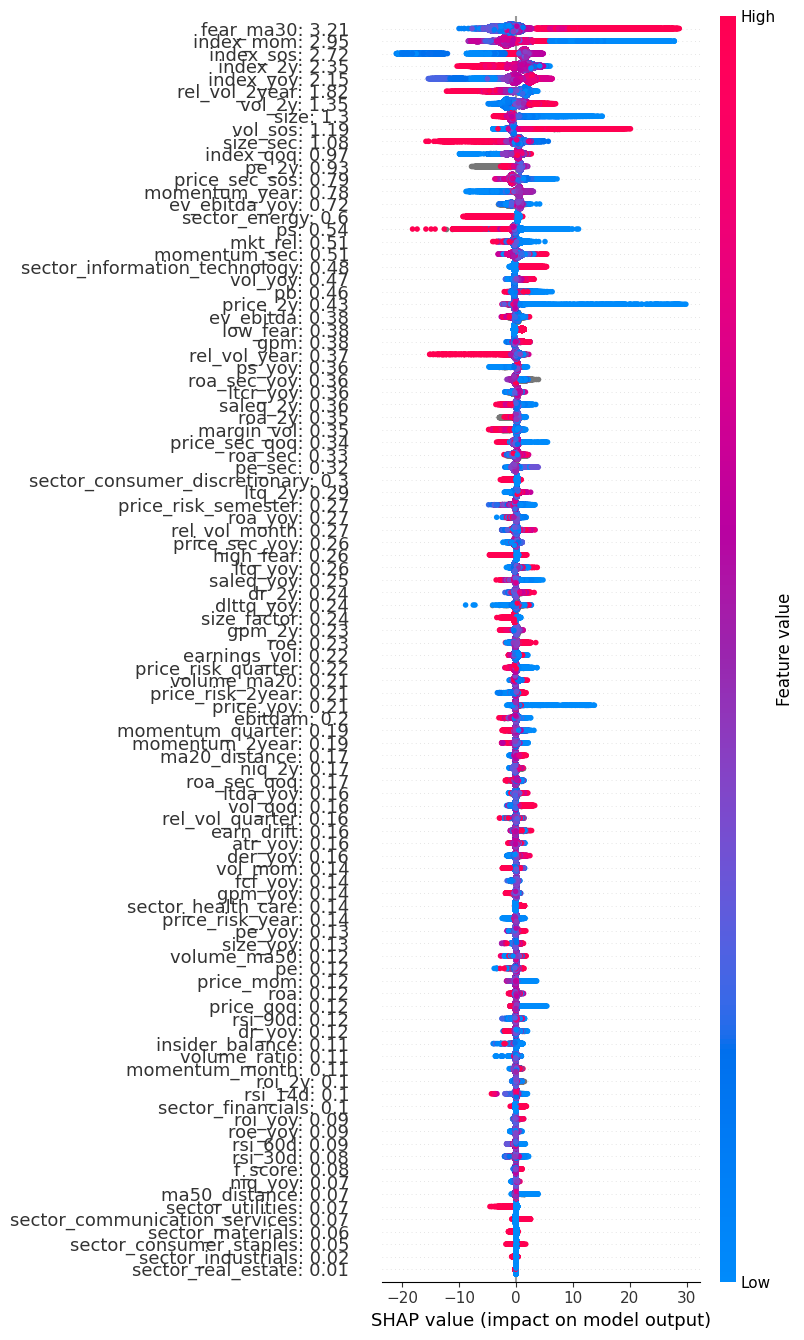

In [13]:
import numpy as np
import shap


def plot_shap(model, X_train):
    explainer = shap.TreeExplainer(model.model)
    shap_values = explainer(X_train)

    feature_names = [
        a + ": " + str(b)
        for a, b in zip(X_train.columns, np.abs(shap_values.values).mean(0).round(2), strict=False)
    ]

    shap.summary_plot(
        shap_values,
        X_train,
        max_display=X_train.shape[1],
        feature_names=feature_names,
        plot_size=(8, 13.5),
    )


plot_shap(model, X_train)